<div class="alert alert-block alert-warning" style="padding-top:0px">

<a id='lib'></a>

## Import the needed libraries
    
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

<div class="alert alert-block alert-warning" style="padding-top:0px">

<a id='integrate'></a>

## Import and integrate data
    
</div>

In [2]:
df_crm = pd.read_csv(r'crm.csv') 

In [3]:
df_mkt = pd.read_csv(r'mkt.csv')

In [4]:
df_sales = pd.read_excel(r'sales.xlsx')

In [5]:
df = pd.merge(df_crm, df_mkt, on = "CustomerID", how = "inner")
df = pd.merge(df, df_sales, on = "CustomerID", how = "inner")

In [6]:
df.shape

(7031, 27)

<div class="alert alert-block alert-warning" style="padding-top:0px">

<a id='index'></a>

## Set Index 
    
</div>

In [7]:
df.set_index("CustomerID", inplace = True)

<div class="alert alert-block alert-warning" style="padding-top:0px">

<a id='duplicates'></a>

## Check for duplicates
    
</div>

In [8]:
df[df.duplicated()].shape

(31, 26)

In [9]:
df.drop_duplicates(inplace = True)
df.shape

(7000, 26)

<div class="alert alert-block alert-warning" style="padding-top:0px">

<a id='duplicates'></a>

## Data Exploration
    
</div>

<div class="alert alert-block alert-info" style="padding-top:0px">

<a id='missing'></a>

### Basic Exploration
    
</div>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 14594 to 15581
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7000 non-null   object 
 1   Birthyear              7000 non-null   int64  
 2   Education              6986 non-null   object 
 3   Marital_Status         7000 non-null   object 
 4   Income                 7000 non-null   float64
 5   Kid_Younger6           7000 non-null   int64  
 6   Children_6to18         7000 non-null   int64  
 7   Response_Cmp1          7000 non-null   int64  
 8   Response_Cmp2          7000 non-null   int64  
 9   Response_Cmp3          7000 non-null   int64  
 10  Response_Cmp4          7000 non-null   int64  
 11  Response_Cmp5          7000 non-null   int64  
 12  Date_Adherence         7000 non-null   object 
 13  Recency                6977 non-null   float64
 14  MntMeat&Fish           7000 non-null   float64
 15 

<div class="alert alert-block alert-info" style="padding-top:0px">

<a id='missing'></a>

### Statistical Exploration  
    
</div>

In [11]:
df.describe().transpose()

count          mean           std     min       25%  \
Birthyear              7000.0   1976.451429     11.996270  1948.0   1967.00   
Income                 7000.0  77988.962407  35409.810253  2493.8  51586.25   
Kid_Younger6           7000.0      0.440571      0.543477     0.0      0.00   
Children_6to18         7000.0      0.490571      0.542174     0.0      0.00   
Response_Cmp1          7000.0      0.079143      0.269981     0.0      0.00   
Response_Cmp2          7000.0      0.073286      0.260624     0.0      0.00   
Response_Cmp3          7000.0      0.083000      0.275902     0.0      0.00   
Response_Cmp4          7000.0      0.065857      0.248050     0.0      0.00   
Response_Cmp5          7000.0      0.014286      0.118675     0.0      0.00   
Recency                6977.0     49.235058     28.922688     0.0     24.00   
MntMeat&Fish           7000.0   3079.523800   3370.377166     0.0    250.00   
MntEntries             7000.0    534.749429    787.846684     0.0     40.00   
MntVegan&Vegetarian    7000.0   2785.050786   3908.718244     0.0    240.00   
MntDrinks              6972.0    545.657544    805.149088     0.0     40.00   
MntDesserts            7000.0    540.656029    802.221866     0.0     40.00   
MntAdditionalRequests  7000.0     42.556186     49.650747     0.0      9.00   
NumOfferPurchases      7000.0      2.448429      2.306968     0.0      1.00   
NumAppPurchases        7000.0      6.015714      2.745537     0.0      4.00   
NumTakeAwayPurchases   7000.0      3.834571      3.331142     0.0      1.00   
NumStorePurchases      7000.0      5.790571      3.295708     0.0      3.00   
NumAppVisitsMonth      7000.0      5.278286      2.748596     0.0      3.00   
Complain               7000.0      0.010286      0.100903     0.0      0.00   

                           50%        75%         max  
Birthyear               1977.0    1985.00    2005.000  
Income                 77190.0  102016.25  237639.725  
Kid_Younger6               0.0       1.00       2.000  
Children_6to18             0.0       1.00       2.000  
Response_Cmp1              0.0       0.00       1.000  
Response_Cmp2              0.0       0.00       1.000  
Response_Cmp3              0.0       0.00       1.000  
Response_Cmp4              0.0       0.00       1.000  
Response_Cmp5              0.0       0.00       1.000  
Recency                   49.0      74.00      99.000  
MntMeat&Fish            1820.0    5070.00   14980.000  
MntEntries               180.0     680.00    3980.000  
MntVegan&Vegetarian     1110.0    3795.00   25974.000  
MntDrinks                180.0     700.00    3980.000  
MntDesserts              180.0     680.00    3980.000  
MntAdditionalRequests     24.0      57.00     249.000  
NumOfferPurchases          2.0       3.00      16.000  
NumAppPurchases            6.0       8.00      13.000  
NumTakeAwayPurchases       3.0       5.00      24.000  
NumStorePurchases          5.0       8.00      13.000  
NumAppVisitsMonth          5.0       7.00      20.000  
Complain                   0.0       0.00       1.000

In [12]:
# stats = df.describe().transpose()

# # Export the result to an Excel file
# stats.to_excel('my_stats.xlsx')

- Variable's skewness and Kurthosis

In [13]:
df.skew()

/var/folders/gj/tj3f44pj0mxdgndq1_f7g6jc0000gn/T/ipykernel_30085/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Birthyear               -0.092478
Income                   0.844721
Kid_Younger6             0.693587
Children_6to18           0.451693
Response_Cmp1            3.118572
Response_Cmp2            3.275500
Response_Cmp3            3.023677
Response_Cmp4            3.501448
Response_Cmp5            8.187993
Recency                  0.017676
MntMeat&Fish             1.148862
MntEntries               2.087220
MntVegan&Vegetarian      2.486897
MntDrinks                2.046308
MntDesserts              2.057811
MntAdditionalRequests    1.826522
NumOfferPurchases        2.860514
NumAppPurchases          0.525873
NumTakeAwayPurchases     2.254158
NumStorePurchases        0.623254
NumAppVisitsMonth        1.005192
Complain                 9.709429
dtype: float64

In [14]:
df.kurt()

/var/folders/gj/tj3f44pj0mxdgndq1_f7g6jc0000gn/T/ipykernel_30085/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Birthyear                -0.857341
Income                    2.649035
Kid_Younger6             -0.651127
Children_6to18           -0.973333
Response_Cmp1             7.727700
Response_Cmp2             8.731398
Response_Cmp3             7.144665
Response_Cmp4            10.263068
Response_Cmp5            65.061813
Recency                  -1.197978
MntMeat&Fish              0.532098
MntEntries                4.096167
MntVegan&Vegetarian       8.431538
MntDrinks                 3.839256
MntDesserts               3.813464
MntAdditionalRequests     3.084190
NumOfferPurchases        10.997946
NumAppPurchases          -0.222899
NumTakeAwayPurchases      8.582138
NumStorePurchases        -0.694327
NumAppVisitsMonth         4.992870
Complain                 92.299387
dtype: float64

- Spearman Correlation

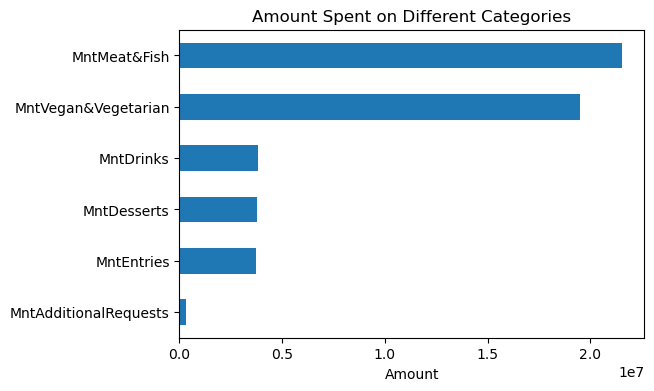

In [15]:
cols_of_interest = ['MntMeat&Fish', 
                    'MntEntries', 
                    'MntVegan&Vegetarian', 
                    'MntDrinks', 
                    'MntDesserts', 
                    'MntAdditionalRequests']

# New dataset with columns of interest
df_selected = df.loc[:, cols_of_interest]

# Sort the series in ascending order
total_amount_spent = df_selected.sum().sort_values(ascending=True)

# Plot the horizontal bar chart
total_amount_spent.plot(kind='barh', figsize=(6, 4))
plt.title('Amount Spent on Different Categories')
plt.xlabel('Amount')
plt.show()

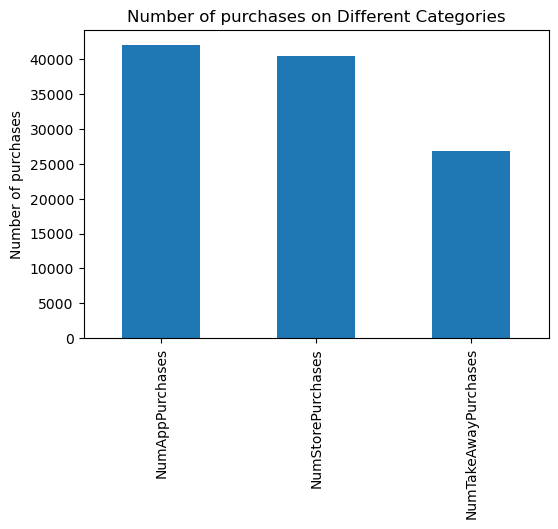

In [16]:
cols_of_interest = ['NumAppPurchases', 
                    'NumTakeAwayPurchases', 
                    'NumStorePurchases']

# New dataset with columns of interest
df_selected = df.loc[:, cols_of_interest]

# Sort the series in descending order
total_purchases = df_selected.sum().sort_values(ascending=False)

# Plot the bar chart
total_purchases.plot(kind='bar', figsize=(6, 4))
plt.title('Number of purchases on Different Categories')
plt.ylabel('Number of purchases')
plt.show()

<AxesSubplot:>

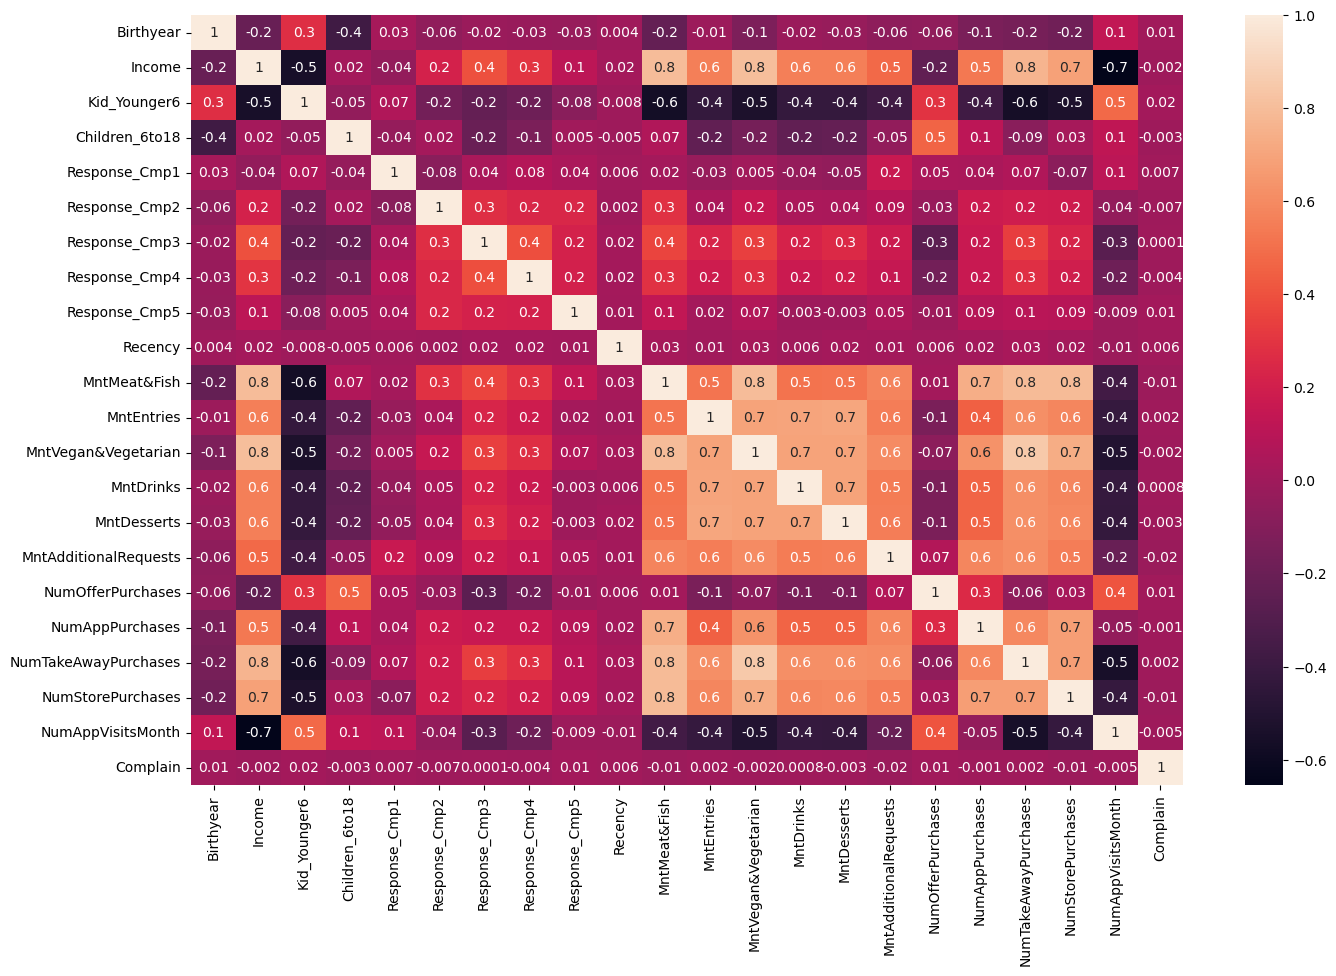

In [17]:
df_corr = df.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [18]:
#plt.savefig('figure.png')

- Categorical Variables

In [19]:
# Main descriptive statistics of the categorical variables
df.describe(include = ['O'])

Name   Education Marital_Status       Date_Adherence
count                7000        6986           7000                 7000
unique               6241           9             10                  701
top     Mr. Stewart Grant  Graduation        Married  2020-09-19 00:00:00
freq                    3        3497           2830                   23

<div class="alert alert-block alert-warning" style="padding-top:0px">

<a id='duplicates'></a>

## Preprocess Data
    
</div>

<div class="alert alert-block alert-info" style="padding-top:0px">

<a id='missing'></a>

### Data Cleaning - Missing Values
    
</div>

In [20]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 1]
print(missing_values)

Education    14
Recency      23
MntDrinks    28
dtype: int64


#### Fill missing values for Education - categorical ordinal variable

In [21]:
df['Education'].mode()

0    Graduation
Name: Education, dtype: object

In [22]:
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])

#### Fill missing values for Recency - numerical discrete variable

<AxesSubplot:xlabel='Recency'>

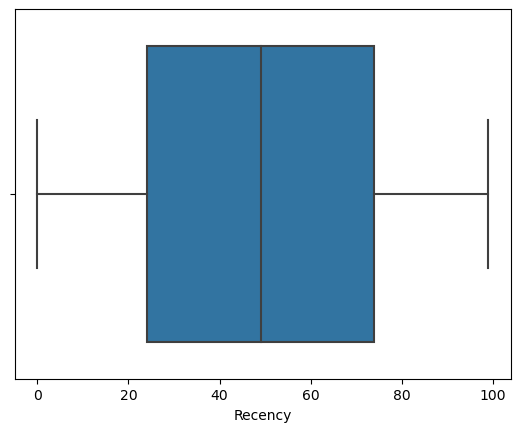

In [23]:
sns.boxplot(data = df, x = 'Recency')

In [24]:
df['Recency'] = df['Recency'].fillna(df['Recency'].median())

#### Fill missing values for MntDrinks - numerical continuos variable

(array([4452.,  934.,  477.,  312.,  261.,  163.,  134.,   97.,   80.,
          62.]),
 array([   0.,  398.,  796., 1194., 1592., 1990., 2388., 2786., 3184.,
        3582., 3980.]),
 <BarContainer object of 10 artists>)

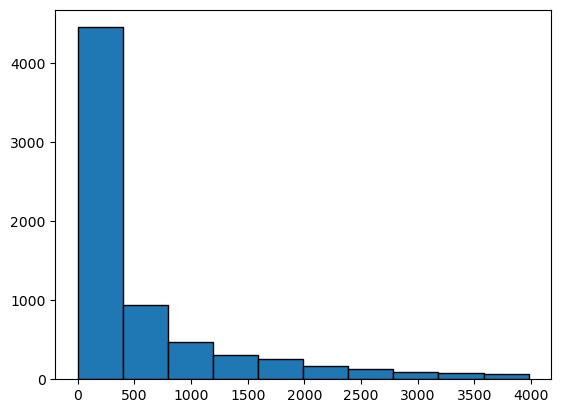

In [25]:
# Histogram to find if variable is normally distributed
plt.hist(df['MntDrinks'], edgecolor='black', bins=10)

In [26]:
spearman_corr = df.corrwith(df['MntDrinks'], method='spearman')

#High Spearman correlations are of >= 0.7
spearman_corr = spearman_corr[(spearman_corr.abs() >= 0.7) & (spearman_corr.index != 'MntDrinks')]

print(spearman_corr)

MntEntries    0.702154
dtype: float64


In [27]:
# KNN imputer 

df_products = df[['MntDrinks','MntEntries']]

imputer = KNNImputer(n_neighbors=83) # odd number closest to sqrt(N)
array_impute = imputer.fit_transform(df_products) 
df_products = pd.DataFrame(array_impute, columns = df_products.columns)

df['MntDrinks'] = df_products['MntDrinks'].values

#### Verify that all missing values were filled

In [28]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 1]
print(missing_values)

Series([], dtype: int64)


<div class="alert alert-block alert-info" style="padding-top:0px">

<a id='missing'></a>

### Data Cleaning - Outliers
    
</div>

In [29]:
# No outliers were deleted

<div class="alert alert-block alert-info" style="padding-top:0px">

<a id='missing'></a>

### Data Transformation - Missclassifications
    
</div>

#### Date that does not exist

In [30]:
df.loc[df["Date_Adherence"] == "2/29/2022", "Date_Adherence"]

CustomerID
27746    2/29/2022
8138     2/29/2022
26654    2/29/2022
14339    2/29/2022
6458     2/29/2022
33863    2/29/2022
31646    2/29/2022
25781    2/29/2022
10133    2/29/2022
9806     2/29/2022
8546     2/29/2022
23744    2/29/2022
29924    2/29/2022
14687    2/29/2022
8876     2/29/2022
12041    2/29/2022
Name: Date_Adherence, dtype: object

In [31]:
# Replace "2/29/2022" with "03/01/2022" in the Date_Adherence column
df['Date_Adherence'] = df['Date_Adherence'].replace('2/29/2022', '2022-03-01 00:00:00')

# convert the 'Date_Adherence' column to datetime format
df['Date_Adherence'] = pd.to_datetime(df['Date_Adherence'])

# remove the hours from the 'Date_Adherence' column
df['Date_Adherence'] = df['Date_Adherence'].dt.date

#### Reclassify Education

In [32]:
df['Education'].value_counts()

Graduation    3511
PhD           1494
Master        1135
HighSchool     663
Basic          179
master           7
graduation       7
phd              2
highschool       2
Name: Education, dtype: int64

In [33]:
df['Education'] = df['Education'].replace({'highschool': 'HighSchool',
                                           'graduation': 'Graduation',
                                           'phd': 'PhD',
                                           'master': 'Master'})

In [34]:
df['Education'].value_counts()

Graduation    3518
PhD           1496
Master        1142
HighSchool     665
Basic          179
Name: Education, dtype: int64

#### Reclassify Marital Status

In [35]:
df['Marital_Status'].value_counts()

Married     2830
Together    1683
Single      1525
Divorced     637
Widow        243
married       36
together      23
single        13
divorced       8
widow          2
Name: Marital_Status, dtype: int64

In [36]:
df['Marital_Status'] = df['Marital_Status'].replace({'widow': 'Widow',
                                                     'divorced': 'Divorced',
                                                     'single': 'Single',
                                                     'together': 'Together',
                                                     'married': 'Married'})

# Reclassify Together as Single
df['Marital_Status'] = df['Marital_Status'].str.replace('Together', 'Single')

In [37]:
df['Marital_Status'].value_counts()

Single      3244
Married     2866
Divorced     645
Widow        245
Name: Marital_Status, dtype: int64

<div class="alert alert-block alert-info" style="padding-top:0px">

<a id='missing'></a>

### Data Transformation - New Variables
    
</div>

In [38]:
df['TotalAmountSpent'] = df['MntMeat&Fish'] + df['MntEntries'] + df['MntVegan&Vegetarian'] + df['MntDrinks'] + df['MntDesserts'] + df['MntAdditionalRequests']

In [39]:
df['TotalNbPurchases'] = df['NumAppPurchases'] + df['NumTakeAwayPurchases'] + df['NumStorePurchases']

In [40]:
df['TotalNbCampaigns'] = df['Response_Cmp1'] + df['Response_Cmp2'] + df['Response_Cmp3'] + df['Response_Cmp4'] + df['Response_Cmp5']

In [41]:
df['TotalNbKids'] = df['Kid_Younger6'] + df['Children_6to18'] 

In [42]:
# Gender
def get_gender(name):
    if 'Mr.' in name:
        return 'Male'
    elif 'Miss' or 'Mrs' in name:
        return 'Female'

# Apply function to Name column to create Gender column
df['Gender'] = df['Name'].apply(lambda x: get_gender(x))

In [43]:
df['Gender'].value_counts()

Male      5133
Female    1867
Name: Gender, dtype: int64

In [44]:
df['Age'] = 2023 - df['Birthyear']

In [45]:
df["AdherenceDays"] = (pd.Timestamp("2023-01-01").date() - df['Date_Adherence']).dt.days
df["AdherenceDays"] = df["AdherenceDays"].astype(int)

<div class="alert alert-block alert-info" style="padding-top:0px">

<a id='missing'></a>

### Data Transformation - Incoherencies
    
</div>

In [46]:
incoherencies_filter = (df["TotalNbPurchases"] == 0) & (df["TotalAmountSpent"] > 0) 
result_df = df.loc[incoherencies_filter]
result_df.shape

(38, 33)

In [47]:
df = df.drop(df[(df["TotalNbPurchases"] == 0) & (df["TotalAmountSpent"] > 0)].index)

<div class="alert alert-block alert-info" style="padding-top:0px">

<a id='missing'></a>

### Data Transformation - Binning
    
</div>

In [48]:
df['Income_bins'], bin_edges = pd.cut(df['Income'], 3, labels=["Low", "Medium", "High"], retbins = True)
bin_edges

array([  2258.654075,  80875.775   , 159257.75    , 237639.725   ])

<div class="alert alert-block alert-warning" style="padding-top:0px">

<a id='duplicates'></a>

## Visual Exploration
    
</div>

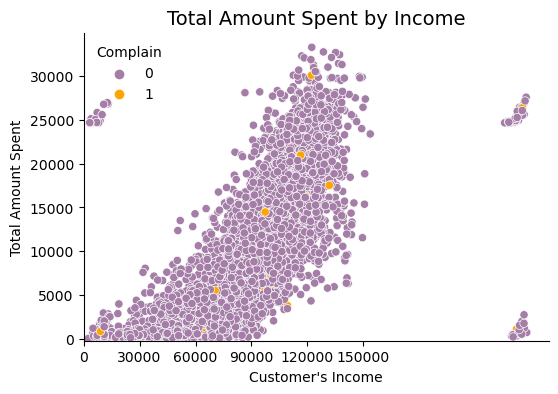

In [49]:
# Size of the figure as (12,8)
fig, ax = plt.subplots(figsize = (6,4))

colors = ['#A47EA7', 'orange']

# Scatterplot with hue variable "Complain"
sns.scatterplot(data = df, x = 'Income', y = 'TotalAmountSpent', hue = 'Complain',  palette = colors, ax = ax)

# Limits of y axis using matplotlib.pyplot.ylim
plt.ylim(-200, None)

# Limits of x axis using matplotlib.pyplot.xlim
plt.xlim(0, None)


plt.xticks(np.arange(0, 160000, 30000))


plt.title('Total Amount Spent by Income', fontsize= 14, color = 'black')


plt.legend(loc = 'upper left', title = 'Complain', frameon = False)


plt.xlabel("Customer's Income")
plt.ylabel("Total Amount Spent")

# Remove the top and right axis of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig('my_plot.png', dpi = 300, transparent = True)


<AxesSubplot:xlabel='Age', ylabel='Income'>

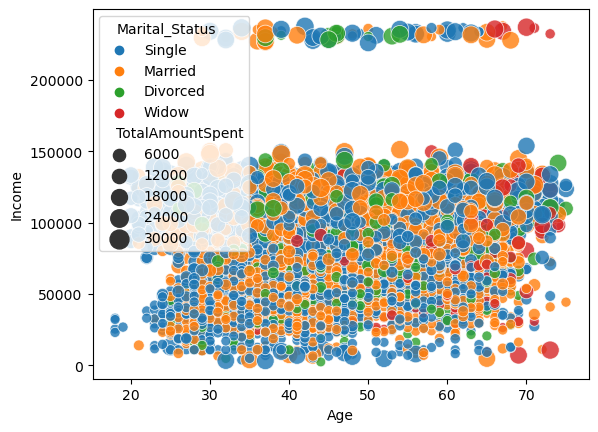

In [50]:
sns.scatterplot(data=df, x='Age', y='Income', hue='Marital_Status', size='TotalAmountSpent', sizes=(50, 200), alpha=0.8)

In [51]:
df.columns

Index(['Name', 'Birthyear', 'Education', 'Marital_Status', 'Income',
       'Kid_Younger6', 'Children_6to18', 'Response_Cmp1', 'Response_Cmp2',
       'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5', 'Date_Adherence',
       'Recency', 'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian',
       'MntDrinks', 'MntDesserts', 'MntAdditionalRequests',
       'NumOfferPurchases', 'NumAppPurchases', 'NumTakeAwayPurchases',
       'NumStorePurchases', 'NumAppVisitsMonth', 'Complain',
       'TotalAmountSpent', 'TotalNbPurchases', 'TotalNbCampaigns',
       'TotalNbKids', 'Gender', 'Age', 'AdherenceDays', 'Income_bins'],
      dtype='object')

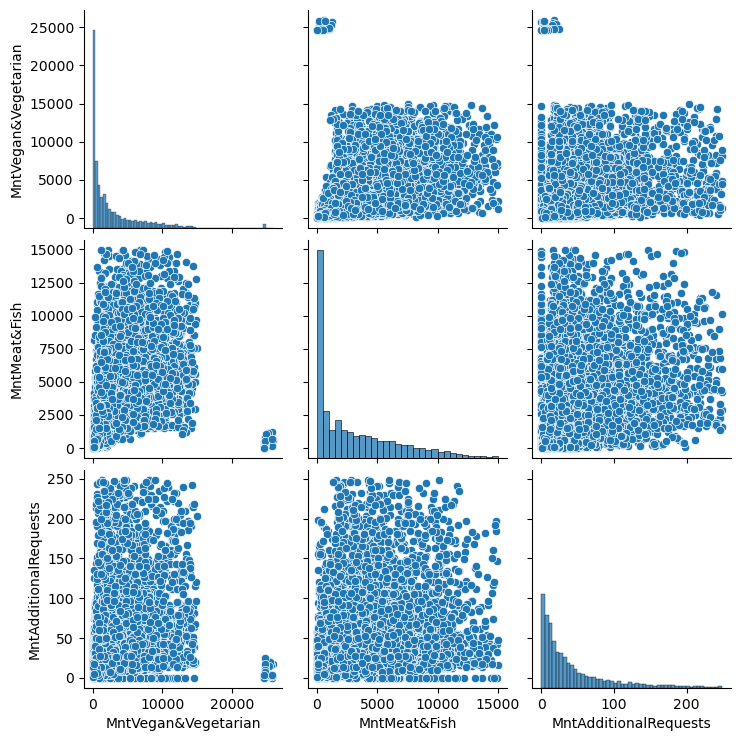

In [52]:
# Checking if there is any relationship between different variables
# 1. Is meal preferencies related with addtional requests?
df_mealpreferencies = df[['MntVegan&Vegetarian', 'MntMeat&Fish', 'MntAdditionalRequests']].copy()
sns.pairplot(df_mealpreferencies)

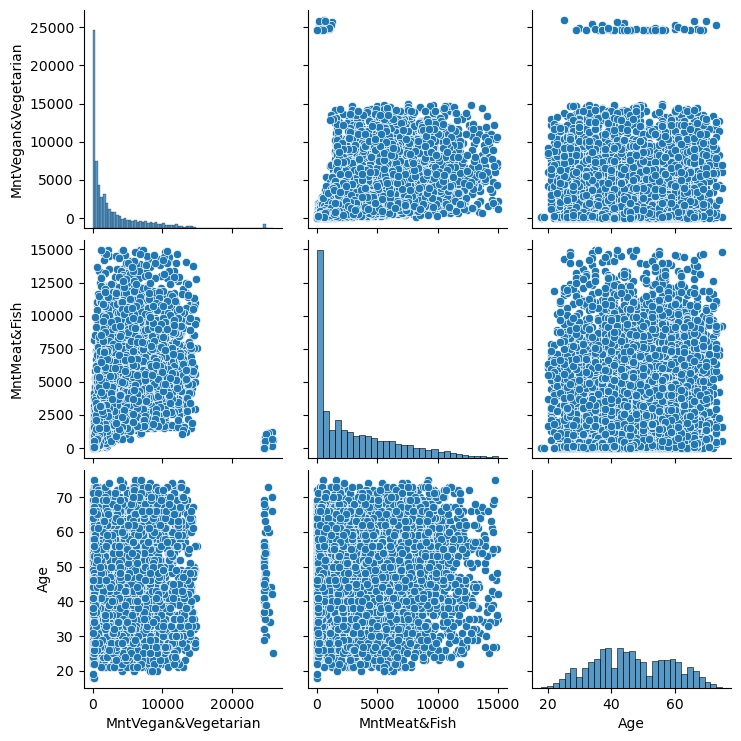

In [53]:
# 2. Is Age related with meal preferencies?
df_agepreferencies = df[['MntVegan&Vegetarian', 'MntMeat&Fish', 'Age']].copy()
sns.pairplot(df_agepreferencies)

In [54]:
df.columns

Index(['Name', 'Birthyear', 'Education', 'Marital_Status', 'Income',
       'Kid_Younger6', 'Children_6to18', 'Response_Cmp1', 'Response_Cmp2',
       'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5', 'Date_Adherence',
       'Recency', 'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian',
       'MntDrinks', 'MntDesserts', 'MntAdditionalRequests',
       'NumOfferPurchases', 'NumAppPurchases', 'NumTakeAwayPurchases',
       'NumStorePurchases', 'NumAppVisitsMonth', 'Complain',
       'TotalAmountSpent', 'TotalNbPurchases', 'TotalNbCampaigns',
       'TotalNbKids', 'Gender', 'Age', 'AdherenceDays', 'Income_bins'],
      dtype='object')

<div class="alert alert-block alert-info" style="padding-top:0px">

<a id='missing'></a>

### Data Transformation - Power Transform
    
</div>

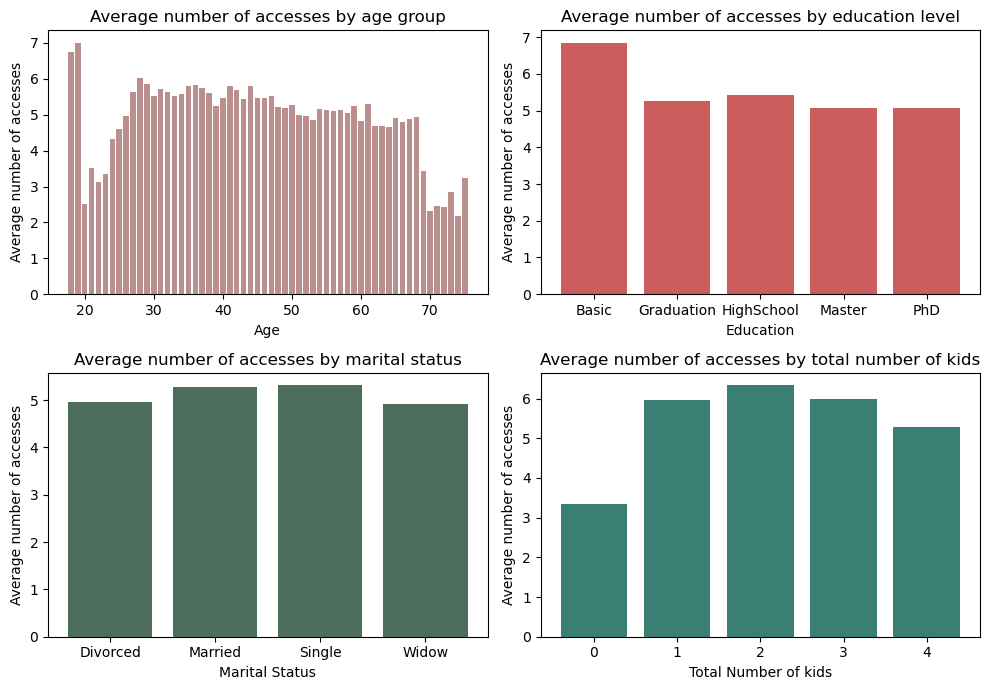

In [55]:
colors = ['#BC8F8F', '#CD5C5C', '#4E6E5D', '#4E6E5D', '#3B7E73']

filtered_data = df.copy()

#Group the data by age, education, and marital status and calculate the average number of accesses
grouped_data_age = filtered_data.groupby('Age')['NumAppVisitsMonth'].mean()
grouped_data_edu = filtered_data.groupby('Education')['NumAppVisitsMonth'].mean()
grouped_data_ms = filtered_data.groupby('Marital_Status')['NumAppVisitsMonth'].mean()
grouped_data_kids = filtered_data.groupby('TotalNbKids')['NumAppVisitsMonth'].mean()

# Create a figure with 4 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Create a bar chart for the average number of accesses by age
axes[0, 0].bar(grouped_data_age.index, grouped_data_age.values, color=colors[0])
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Average number of accesses')
axes[0, 0].set_title('Average number of accesses by age group')

# Create a bar chart for the average number of accesses by education
axes[0, 1].bar(grouped_data_edu.index, grouped_data_edu.values, color=colors[1])
axes[0, 1].set_xlabel('Education')
axes[0, 1].set_ylabel('Average number of accesses')
axes[0, 1].set_title('Average number of accesses by education level')

# Create a bar chart for the average number of accesses by marital status
axes[1, 0].bar(grouped_data_ms.index, grouped_data_ms.values, color=colors[3])
axes[1, 0].set_xlabel('Marital Status')
axes[1, 0].set_ylabel('Average number of accesses')
axes[1, 0].set_title('Average number of accesses by marital status')

# Create a bar chart for the average number of accesses by total number of kids
axes[1, 1].bar(grouped_data_kids.index, grouped_data_kids.values, color=colors[4])
axes[1, 1].set_xlabel('Total Number of kids')
axes[1, 1].set_ylabel('Average number of accesses')
axes[1, 1].set_title('Average number of accesses by total number of kids')

# Adjust the layout of the subplots
plt.tight_layout()

# Display the plots
plt.show()


<div class="alert alert-block alert-warning" style="padding-top:0px">

<a id='integrate'></a>

## Clustering Techniques
    
</div>

<div class="alert alert-block alert-info" style="padding-top:0px">

<a id='missing'></a>

### Behavioral Cluster Segmentation
    
</div>

In [56]:
df_product = df[['MntMeat&Fish',
                 'MntEntries',
                 'MntVegan&Vegetarian',
                 'MntDrinks',
                 'MntDesserts', 
                 'MntAdditionalRequests',
                 'NumAppPurchases',
                 'NumTakeAwayPurchases',
                 'NumStorePurchases']].copy()

scaled_df_product = MinMaxScaler().fit_transform(df_product)
cols = df_product.columns
original_index = df_product.index
scaled_df_product = pd.DataFrame(scaled_df_product, columns = cols, index=original_index)

#### K-Means

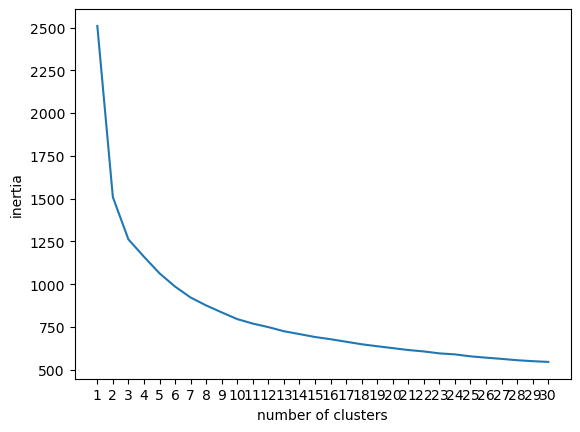

In [57]:
# Elbow method

ks = range(1, 31)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(scaled_df_product)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)

plt.savefig("KMeans_behavior.jpg")

plt.show()

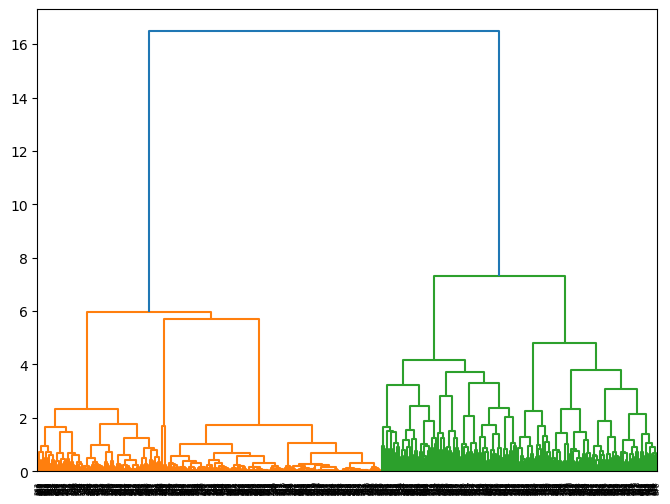

In [58]:
# Dendrogram

# Get a random sample, as hierarchical clustering can take a lot of time to run.
df_product_sample = scaled_df_product.sample(n = 1000, random_state = 100)

# create clusters using the "ward method"
clusters = hierarchy.linkage(df_product_sample, method="ward")

# create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

#plt.savefig("Dendrogram_behavior.jpg")

In [59]:
#KMeans K = 5

df_product_k5 = scaled_df_product.copy()

model_k5 = KMeans(n_clusters=5, random_state = 100).fit(df_product_k5)

df_product_k5['product_cluster'] = model_k5.labels_

df_product_k5.groupby(['product_cluster']).mean().transpose()

product_cluster               0         1         2         3         4
MntMeat&Fish           0.203873  0.024018  0.506946  0.351843  0.019138
MntEntries             0.094194  0.022603  0.162710  0.441919  0.013328
MntVegan&Vegetarian    0.076566  0.011388  0.185532  0.258035  0.847329
MntDrinks              0.097801  0.022721  0.170483  0.445449  0.012329
MntDesserts            0.095500  0.022544  0.157793  0.454310  0.013220
MntAdditionalRequests  0.221606  0.052365  0.233047  0.344661  0.020086
NumAppPurchases        0.593120  0.300013  0.633560  0.552395  0.040134
NumTakeAwayPurchases   0.153493  0.061192  0.249569  0.279556  0.855676
NumStorePurchases      0.473022  0.236707  0.742611  0.645713  0.035674

In [60]:
#KMeans K=6

df_product_k6 = scaled_df_product.copy()

model_k6 = KMeans(n_clusters=6, random_state = 100).fit(df_product_k6)

df_product_k6['product_cluster'] = model_k6.labels_

df_product_k6.groupby(['product_cluster']).mean().transpose()

product_cluster               0         1         2         3         4  \
MntMeat&Fish           0.023340  0.195804  0.392190  0.519510  0.311032   
MntEntries             0.022518  0.086910  0.389058  0.149017  0.428081   
MntVegan&Vegetarian    0.011205  0.072215  0.262882  0.171895  0.243939   
MntDrinks              0.022617  0.086630  0.372992  0.142419  0.478714   
MntDesserts            0.022391  0.091889  0.652487  0.144645  0.208897   
MntAdditionalRequests  0.051606  0.216577  0.309902  0.220062  0.366818   
NumAppPurchases        0.298533  0.586684  0.568740  0.648870  0.540917   
NumTakeAwayPurchases   0.060834  0.149109  0.282801  0.243590  0.269504   
NumStorePurchases      0.235589  0.467109  0.646130  0.734400  0.654664   

product_cluster               5  
MntMeat&Fish           0.019138  
MntEntries             0.013328  
MntVegan&Vegetarian    0.847329  
MntDrinks              0.012329  
MntDesserts            0.013220  
MntAdditionalRequests  0.020086  
NumAppPurchases        0.040134  
NumTakeAwayPurchases   0.855676  
NumStorePurchases      0.035674

In [61]:
#for i, col1 in enumerate(df_product.columns):
#    for j, col2 in enumerate(df_product.columns):
#        if j <= i:
#            continue
#        cols = [col1, col2]
#        data = df_product_k6[cols + ['product_cluster']]
#        g = sns.pairplot(data, hue='product_cluster', palette=colors, diag_kind='hist', corner=True, height=2.5)
#        g.add_legend()
#        plt.savefig(f"KMeans_products_{col1}_vs_{col2}.jpg")
#        plt.show()

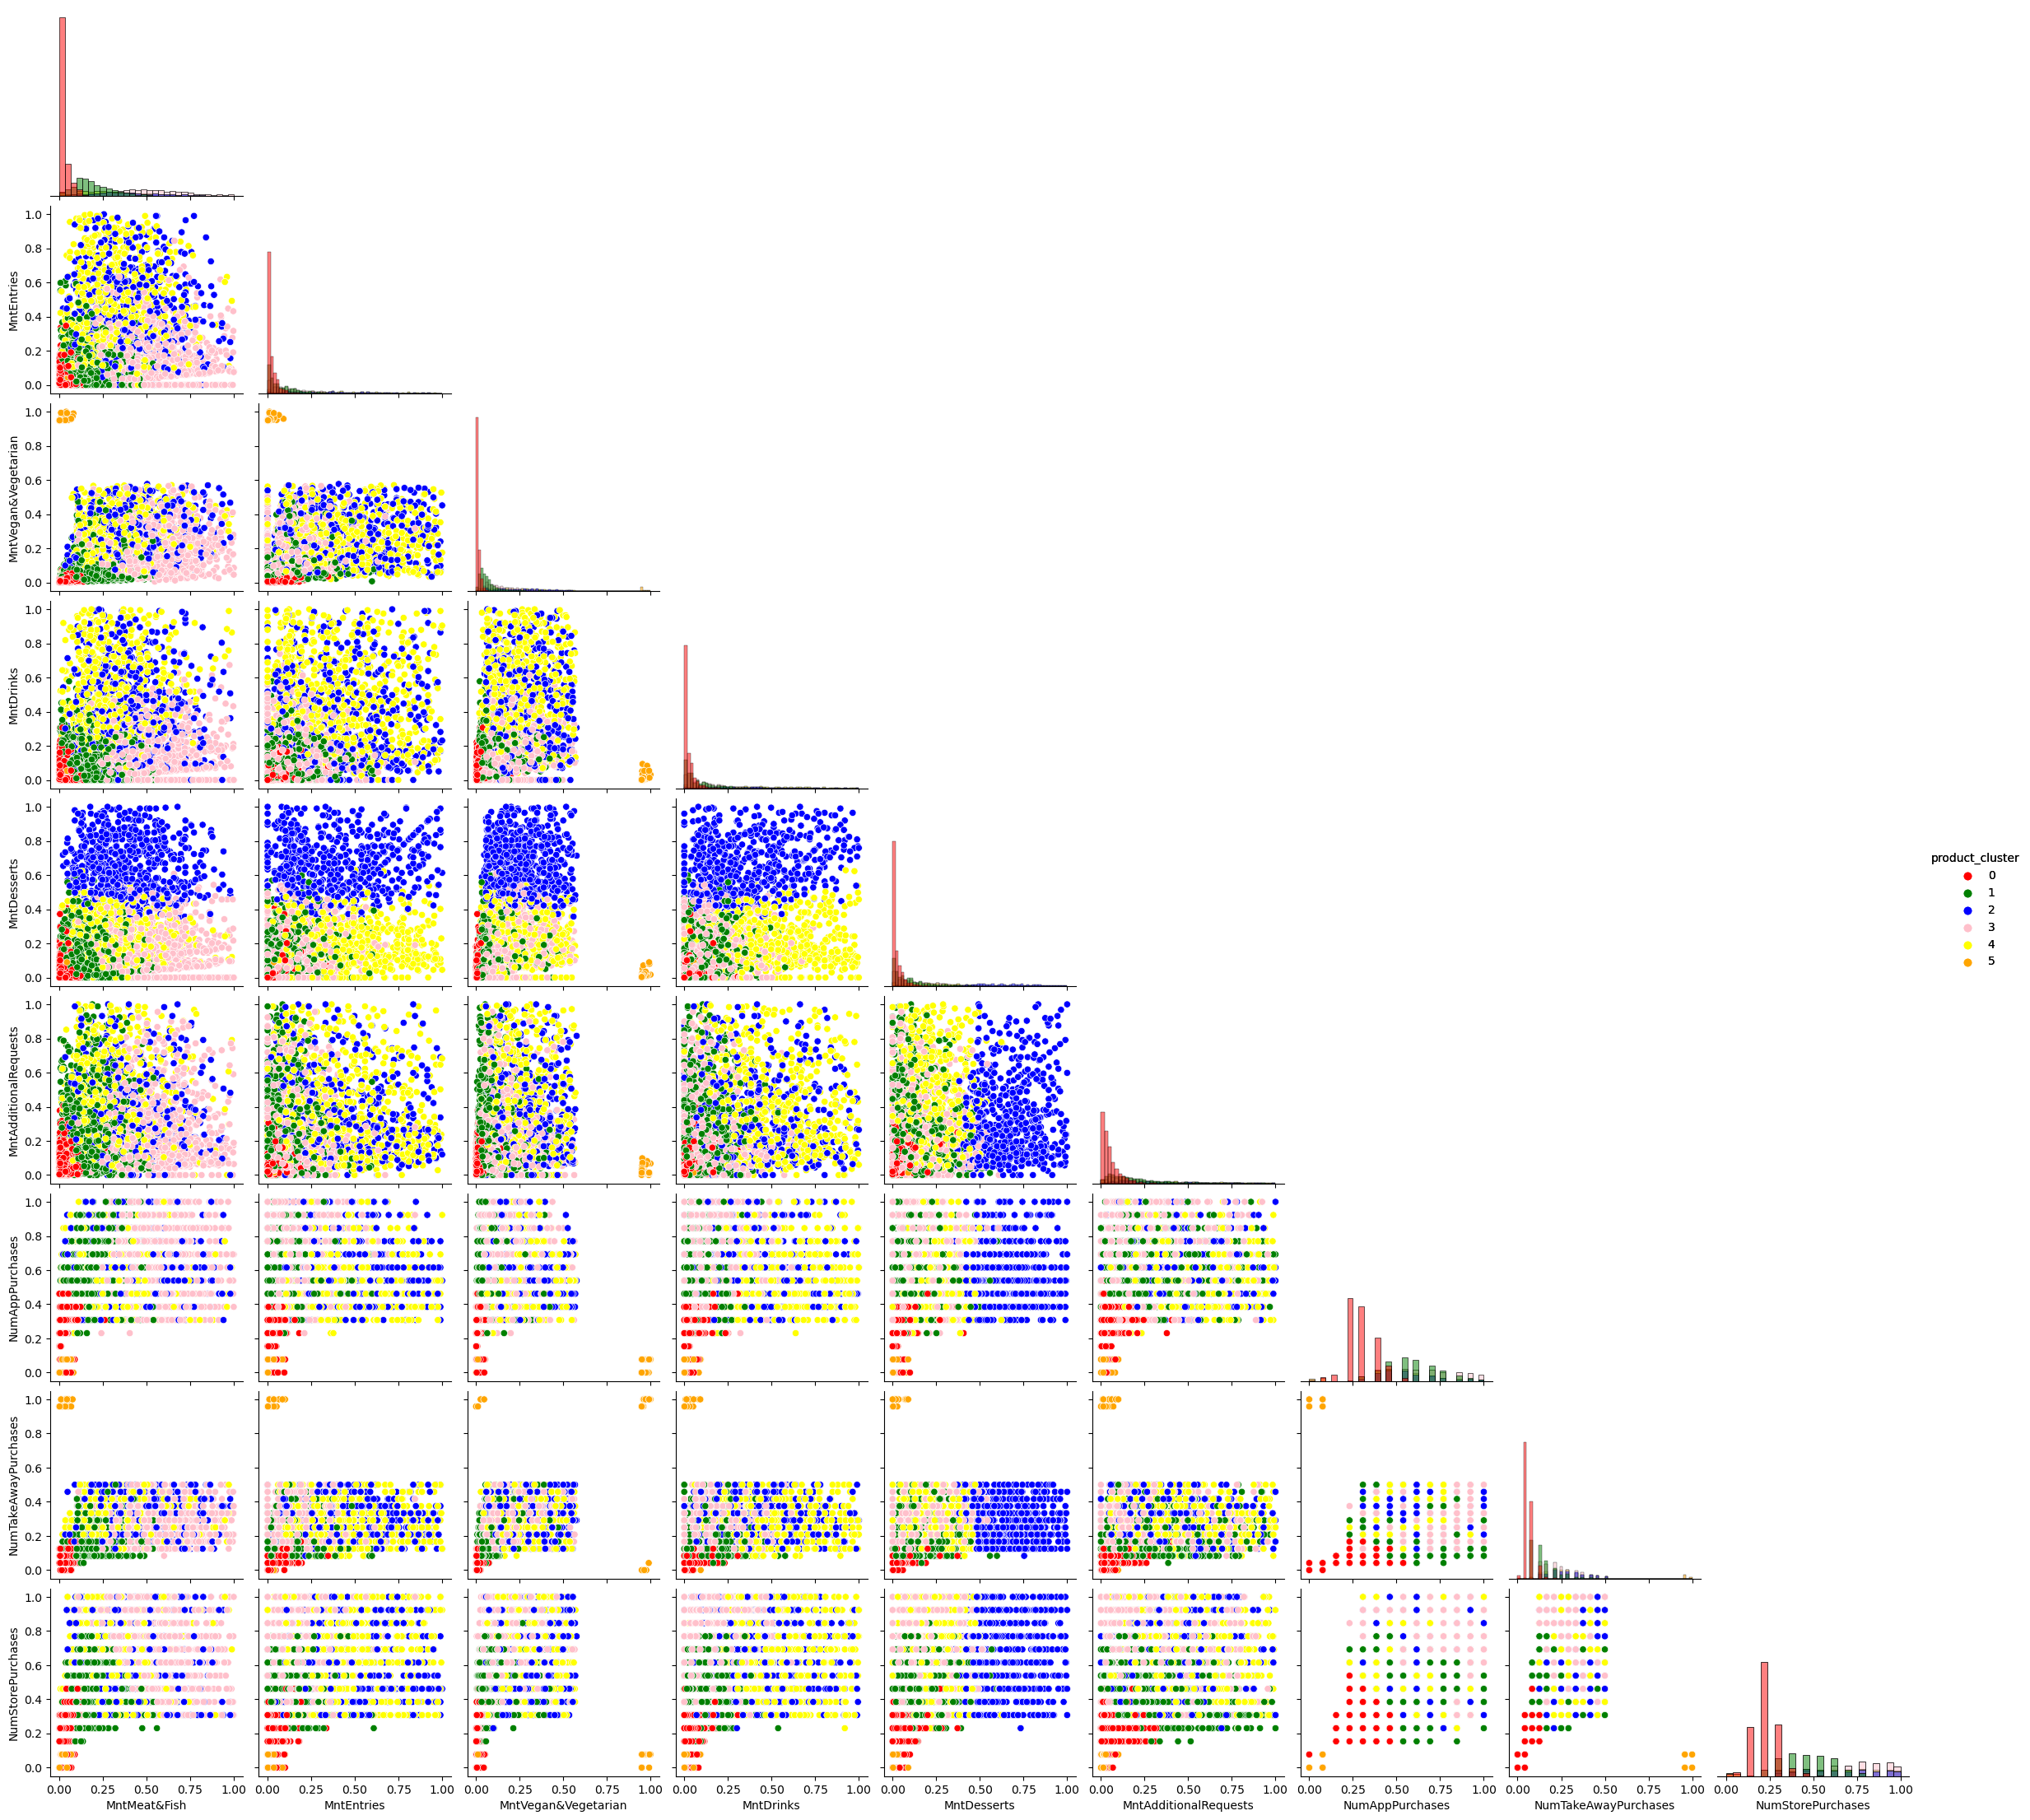

In [62]:
# Define the colors for the clusters
colors = ['red', 'green', 'blue', 'pink', 'yellow', 'orange']

# Add the cluster labels as a new column in the original dataframe
df_product_k6['product_cluster'] = model_k6.labels_

# Create a pair plot with hue set to the cluster labels
g = sns.pairplot(df_product_k6, hue='product_cluster', palette=colors, diag_kind='hist', corner=True, height=2.5)

# Add a legend to the plot
g.add_legend()

plt.savefig("KMeans_products.jpg")

# Show the plot
plt.show()

#### DBSCAN

In [63]:
#DBSCAN

# Create a DBSCAN object
dbscan = DBSCAN(eps=0.34, min_samples=10)

# Fit the DBSCAN model on your data
dbscan.fit(scaled_df_product)

# Get the labels of each point in the dataset
labels = dbscan.labels_

# Concatenate the labels with your original data
df_product_dbscan = pd.concat([scaled_df_product.reset_index(drop=True), pd.Series(labels, name='Cluster')], axis=1)

# Group the data by the labels and compute the mean of each group
df_means = df_product_dbscan.groupby('Cluster').mean()

# Print the mean of each cluster by each column
df_means.transpose()

Cluster                      -1         0         1
MntMeat&Fish           0.415059  0.186610  0.017596
MntEntries             0.468019  0.101499  0.009870
MntVegan&Vegetarian    0.283832  0.082006  0.955609
MntDrinks              0.489498  0.102431  0.009055
MntDesserts            0.465377  0.103423  0.010496
MntAdditionalRequests  0.416628  0.147642  0.016223
NumAppPurchases        0.577337  0.457261  0.034833
NumTakeAwayPurchases   0.299347  0.139395  0.966195
NumStorePurchases      0.625192  0.432935  0.031930

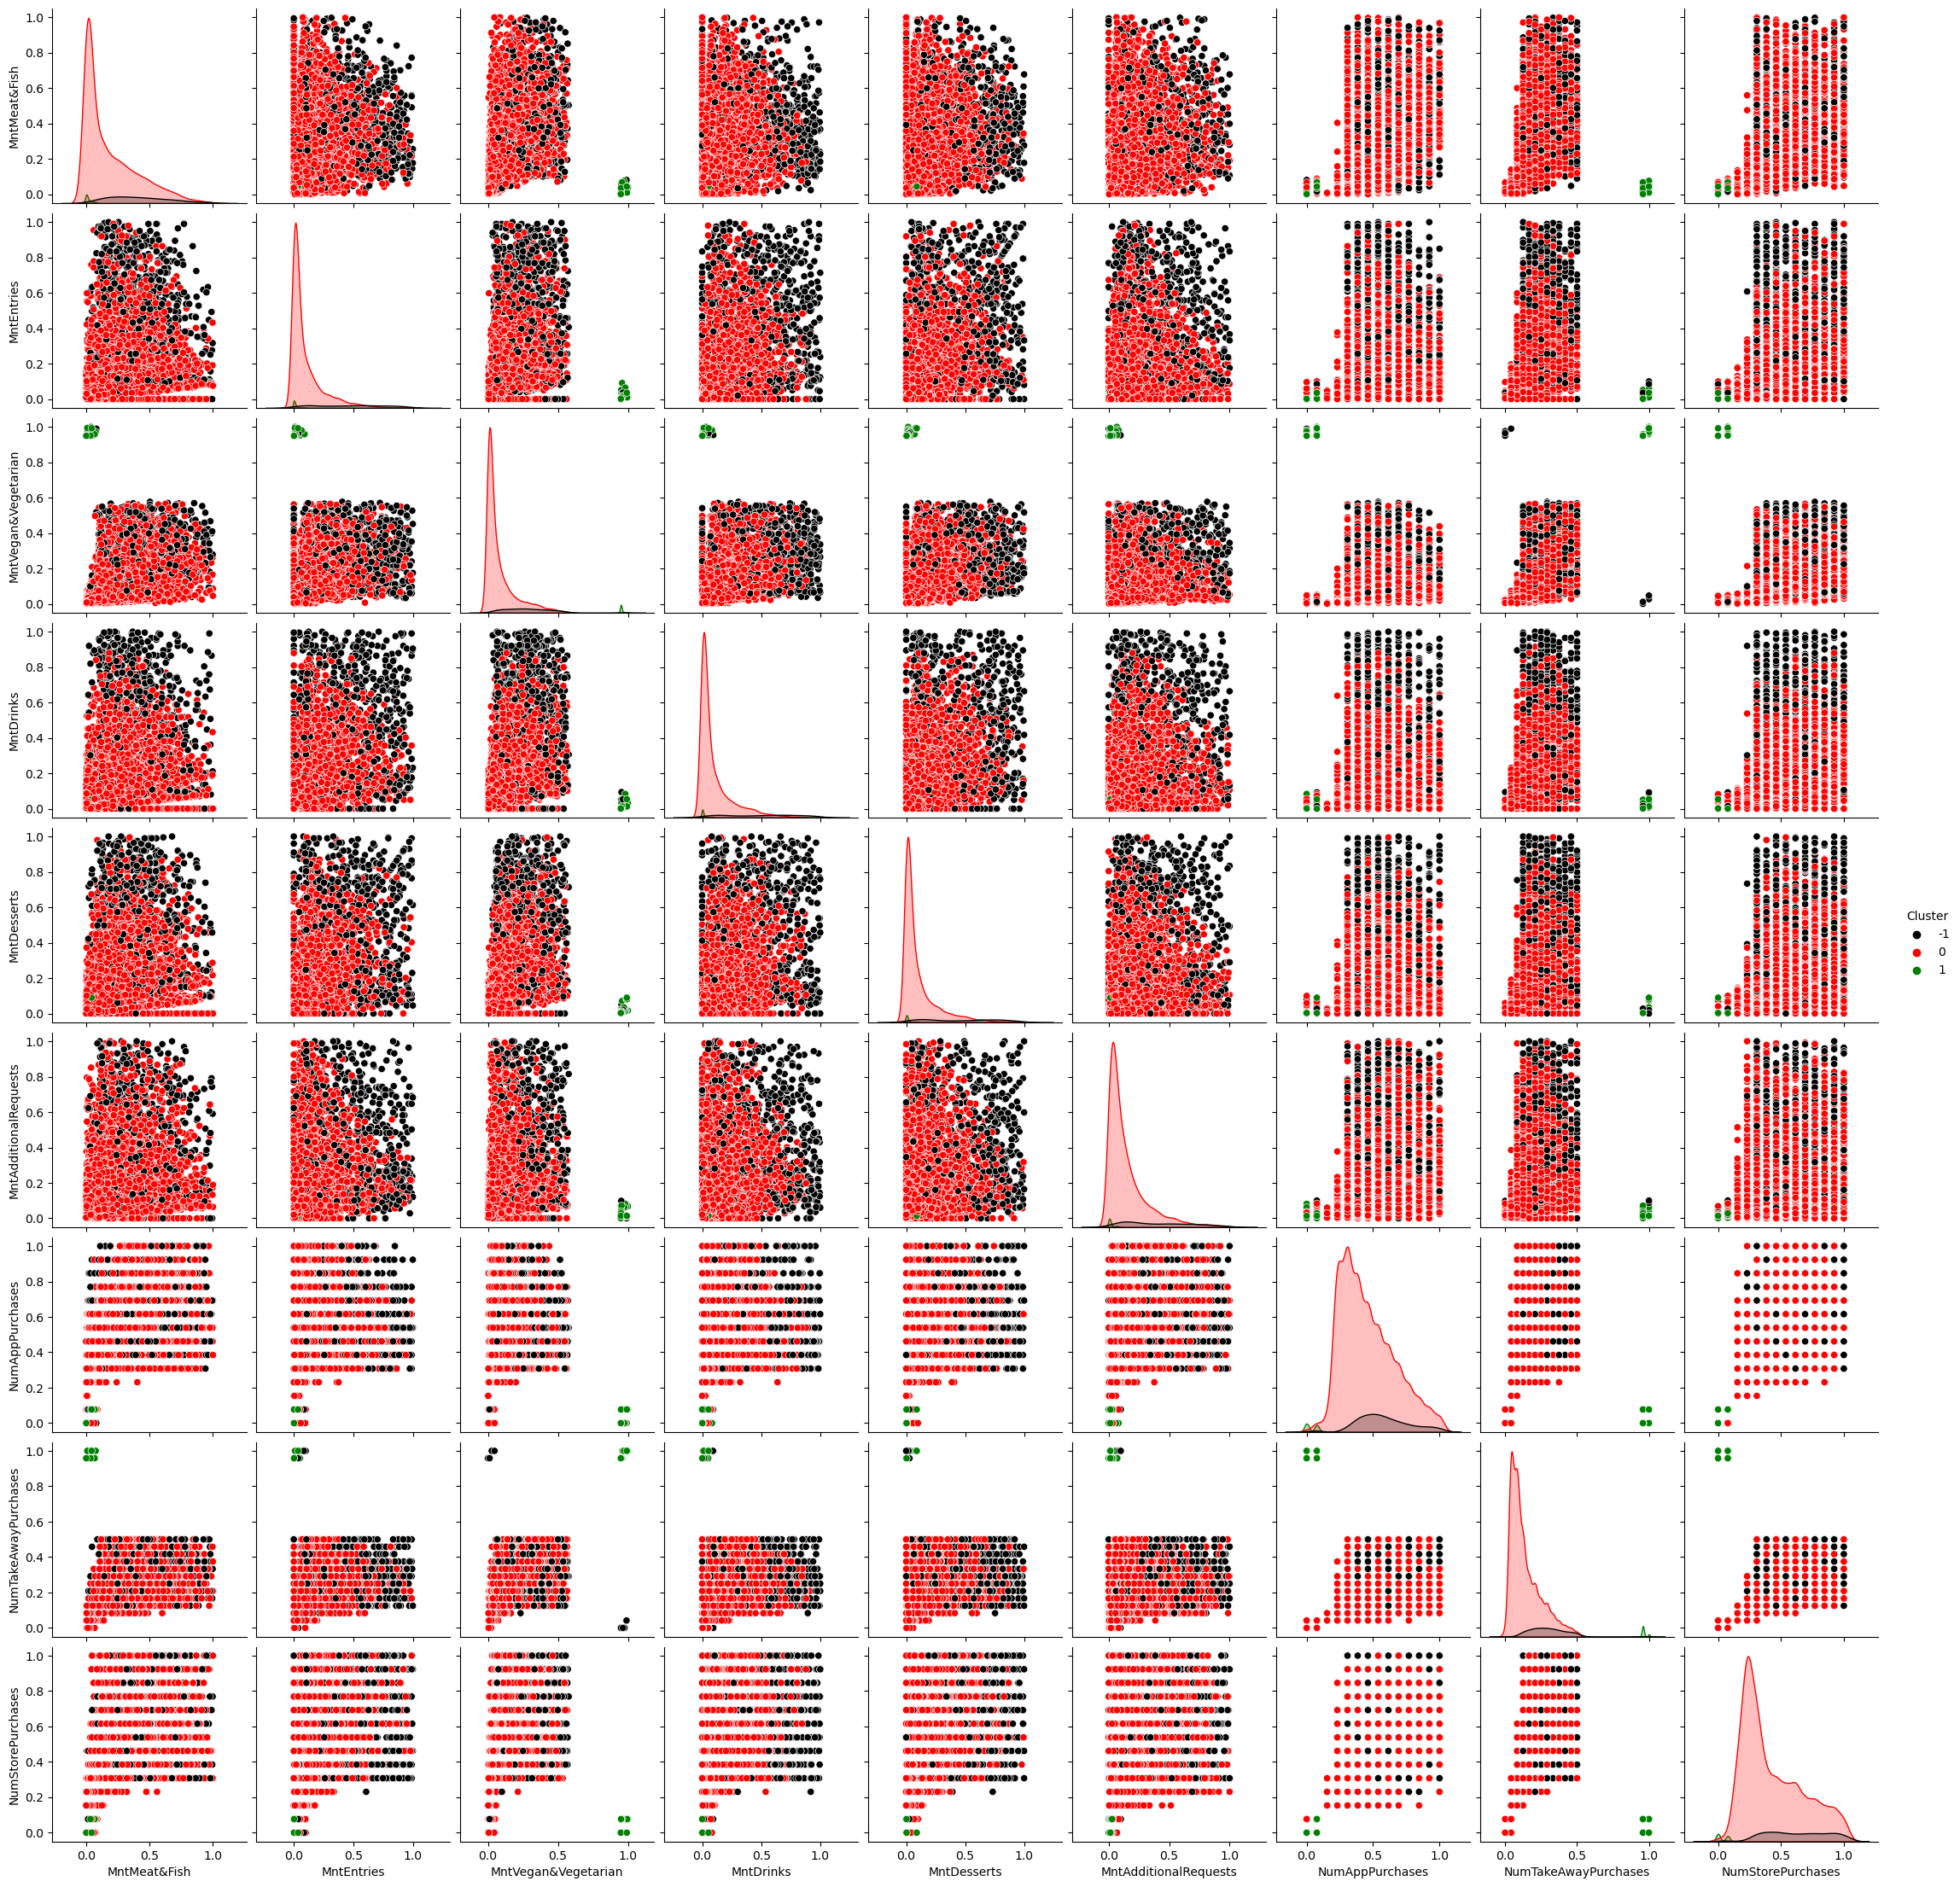

In [64]:
# Set the color palette to use for the clusters
palette = sns.color_palette(['black','red','green'])

# Create the pair plot
sns.pairplot(df_product_dbscan, hue='Cluster', palette=palette)

# Show the plot
plt.show()

In [65]:
df_original = df[['MntMeat&Fish',
                 'MntEntries',
                 'MntVegan&Vegetarian',
                 'MntDrinks',
                 'MntDesserts', 
                 'MntAdditionalRequests',
                 'NumAppPurchases',
                 'NumTakeAwayPurchases',
                 'NumStorePurchases']].copy()
demo_view = pd.concat([df_product_k6, df_original], axis=1)

In [66]:
demo_view[demo_view["product_cluster"] == 0][['MntMeat&Fish','MntEntries','MntVegan&Vegetarian','MntDrinks','MntDesserts', 'MntAdditionalRequests','NumAppPurchases','NumTakeAwayPurchases','NumStorePurchases']].describe()

MntMeat&Fish  MntMeat&Fish   MntEntries   MntEntries  \
count   2889.000000   2889.000000  2889.000000  2889.000000   
mean       0.023340    349.640118     0.022518    89.621322   
std        0.027767    415.955358     0.032032   127.488262   
min        0.000000      0.000000     0.000000     0.000000   
25%        0.004673     70.000000     0.005025    20.000000   
50%        0.012684    190.000000     0.010050    40.000000   
75%        0.030040    450.000000     0.030151   120.000000   
max        0.260347   3900.000000     0.346734  1380.000000   

       MntVegan&Vegetarian  MntVegan&Vegetarian    MntDrinks    MntDrinks  \
count          2889.000000          2889.000000  2889.000000  2889.000000   
mean              0.011205           291.037383     0.022617    90.017106   
std               0.011218           291.365098     0.032088   127.710569   
min               0.000000             0.000000     0.000000     0.000000   
25%               0.004043           105.000000     0.000000     0.000000   
50%               0.007508           195.000000     0.010050    40.000000   
75%               0.013860           360.000000     0.030151   120.000000   
max               0.202703          5265.000000     0.306533  1220.000000   

       MntDesserts  MntDesserts  MntAdditionalRequests  MntAdditionalRequests  \
count  2889.000000  2889.000000            2889.000000            2889.000000   
mean      0.022391    89.114503               0.051606              12.849948   
std       0.032878   130.854412               0.053694              13.369804   
min       0.000000     0.000000               0.000000               0.000000   
25%       0.000000     0.000000               0.016064               4.000000   
50%       0.010050    40.000000               0.036145               9.000000   
75%       0.030151   120.000000               0.068273              17.000000   
max       0.407035  1620.000000               0.417671             104.000000   

       NumAppPurchases  NumAppPurchases  NumTakeAwayPurchases  \
count      2889.000000      2889.000000           2889.000000   
mean          0.298533         3.880928              0.060834   
std           0.087362         1.135708              0.027994   
min           0.000000         0.000000              0.000000   
25%           0.230769         3.000000              0.041667   
50%           0.307692         4.000000              0.041667   
75%           0.384615         5.000000              0.083333   
max           0.615385         8.000000              0.250000   

       NumTakeAwayPurchases  NumStorePurchases  NumStorePurchases  
count           2889.000000        2889.000000        2889.000000  
mean               1.460021           0.235589           3.062651  
std                0.671860           0.069884           0.908497  
min                0.000000           0.000000           0.000000  
25%                1.000000           0.230769           3.000000  
50%                1.000000           0.230769           3.000000  
75%                2.000000           0.307692           4.000000  
max                6.000000           0.538462           7.000000

In [67]:
df_demog = df[['Gender','Education','Marital_Status','TotalNbKids','Income_bins','Age','AdherenceDays','TotalNbCampaigns','NumOfferPurchases']].copy()
demo_view = pd.concat([df_product_k6, df_demog], axis=1)

cluster0_demo = demo_view[demo_view.product_cluster==0]
cluster1_demo = demo_view[demo_view.product_cluster==1]
cluster2_demo = demo_view[demo_view.product_cluster==2]
cluster3_demo = demo_view[demo_view.product_cluster==3]
cluster4_demo = demo_view[demo_view.product_cluster==4]
cluster5_demo = demo_view[demo_view.product_cluster==5]

demo_view.shape

(6962, 19)

In [68]:
print('***Descriptive Summary of Categorical variables***')
print(cluster0_demo.describe(include = ['O']))

print(' ')
print('***Mean of Dependents***')
print(cluster0_demo['TotalNbKids'].mean())

print(' ')
print('***Mode of Income Bins***')
print(cluster0_demo['Income_bins'].mode())

print(' ')
print('***Average Age***')
print(cluster0_demo['Age'].mean())

print(' ')
print('***Average Adherence Days***')
print(cluster0_demo['AdherenceDays'].mean())

***Descriptive Summary of Categorical variables***
       Gender   Education Marital_Status
count    2889        2889           2889
unique      2           5              4
top      Male  Graduation         Single
freq     2115        1446           1388
 
***Mean of Dependents***
1.25822083766009
 
***Mode of Income Bins***
0    Low
Name: Income_bins, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']
 
***Average Age***
44.18483904465213
 
***Average Adherence Days***
499.282104534441


In [69]:
print('***Descriptive Summary of Categorical variables***')
print(cluster1_demo.describe(include = ['O']))

print(' ')
print('***Mean of Dependents***')
print(cluster1_demo['TotalNbKids'].mean())

print(' ')
print('***Mode of Income Bins***')
print(cluster1_demo['Income_bins'].mode())

print(' ')
print('***Average Age***')
print(cluster1_demo['Age'].mean())

print(' ')
print('***Average Adherence Days***')
print(cluster1_demo['AdherenceDays'].mean())

***Descriptive Summary of Categorical variables***
       Gender   Education Marital_Status
count    1450        1450           1450
unique      2           5              4
top      Male  Graduation         Single
freq     1071         702            634
 
***Mean of Dependents***
1.0593103448275862
 
***Mode of Income Bins***
0    Low
Name: Income_bins, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']
 
***Average Age***
47.824137931034485
 
***Average Adherence Days***
545.4055172413794


In [70]:
print('***Descriptive Summary of Categorical variables***')
print(cluster2_demo.describe(include = ['O']))

print(' ')
print('***Mean of Dependents***')
print(cluster2_demo['TotalNbKids'].mean())

print(' ')
print('***Mode of Income Bins***')
print(cluster2_demo['Income_bins'].mode())

print(' ')
print('***Average Age***')
print(cluster2_demo['Age'].mean())

print(' ')
print('***Average Adherence Days***')
print(cluster2_demo['AdherenceDays'].mean())

***Descriptive Summary of Categorical variables***
       Gender   Education Marital_Status
count     658         658            658
unique      2           5              4
top      Male  Graduation         Single
freq      476         401            329
 
***Mean of Dependents***
0.30243161094224924
 
***Mode of Income Bins***
0    Medium
Name: Income_bins, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']
 
***Average Age***
48.01975683890578
 
***Average Adherence Days***
578.4984802431611


In [71]:
print('***Descriptive Summary of Categorical variables***')
print(cluster3_demo.describe(include = ['O']))

print(' ')
print('***Mean of Dependents***')
print(cluster3_demo['TotalNbKids'].mean())

print(' ')
print('***Mode of Income Bins***')
print(cluster3_demo['Income_bins'].mode())

print(' ')
print('***Average Age***')
print(cluster3_demo['Age'].mean())

print(' ')
print('***Average Adherence Days***')
print(cluster3_demo['AdherenceDays'].mean())

***Descriptive Summary of Categorical variables***
       Gender   Education Marital_Status
count    1144        1144           1144
unique      2           4              4
top      Male  Graduation         Single
freq      845         463            483
 
***Mean of Dependents***
0.6625874125874126
 
***Mode of Income Bins***
0    Medium
Name: Income_bins, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']
 
***Average Age***
49.90909090909091
 
***Average Adherence Days***
568.2954545454545


In [72]:
print('***Descriptive Summary of Categorical variables***')
print(cluster4_demo.describe(include = ['O']))

print(' ')
print('***Mean of Dependents***')
print(cluster4_demo['TotalNbKids'].mean())

print(' ')
print('***Mode of Income Bins***')
print(cluster4_demo['Income_bins'].mode())

print(' ')
print('***Average Age***')
print(cluster4_demo['Age'].mean())

print(' ')
print('***Average Adherence Days***')
print(cluster4_demo['AdherenceDays'].mean())

***Descriptive Summary of Categorical variables***
       Gender   Education Marital_Status
count     752         752            752
unique      2           5              4
top      Male  Graduation         Single
freq      547         450            361
 
***Mean of Dependents***
0.363031914893617
 
***Mode of Income Bins***
0    Medium
Name: Income_bins, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']
 
***Average Age***
46.702127659574465
 
***Average Adherence Days***
544.4973404255319


In [73]:
print('***Descriptive Summary of Categorical variables***')
print(cluster5_demo.describe(include = ['O']))

print(' ')
print('***Mean of Dependents***')
print(cluster5_demo['TotalNbKids'].mean())

print(' ')
print('***Mode of Income Bins***')
print(cluster5_demo['Income_bins'].mode())

print(' ')
print('***Average Age***')
print(cluster5_demo['Age'].mean())

print(' ')
print('***Average Adherence Days***')
print(cluster5_demo['AdherenceDays'].mean())

***Descriptive Summary of Categorical variables***
       Gender   Education Marital_Status
count      69          69             69
unique      2           5              4
top      Male  Graduation         Single
freq       50          39             34
 
***Mean of Dependents***
1.0144927536231885
 
***Mode of Income Bins***
0    High
Name: Income_bins, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']
 
***Average Age***
47.72463768115942
 
***Average Adherence Days***
556.5942028985507


In [74]:
df_original = df[['AdherenceDays','TotalNbCampaigns','NumOfferPurchases']].copy()
demo_view = pd.concat([df_product_k6, df_original], axis=1)

In [75]:
# The number of the cluster was changed to obtain results for the six clusters
demo_view[demo_view["product_cluster"] == 5][['AdherenceDays','TotalNbCampaigns','NumOfferPurchases']].describe()

AdherenceDays  TotalNbCampaigns  NumOfferPurchases
count      69.000000         69.000000          69.000000
mean      556.594203          0.304348          12.014493
std       186.129013          0.692488           6.110485
min       190.000000          0.000000           0.000000
25%       420.000000          0.000000          15.000000
50%       530.000000          0.000000          15.000000
75%       722.000000          0.000000          15.000000
max       868.000000          3.000000          16.000000

<div class="alert alert-block alert-info" style="padding-top:0px">

<a id='missing'></a>

### Behavioral Cluster Segmentation
    
</div>

In [76]:
df_RFM = df[["Recency", "TotalNbPurchases","TotalAmountSpent"]].copy()
df_RFM = df_RFM.rename(columns={"Recency": "Recency", 
                                "TotalNbPurchases": "Frequency", 
                                "TotalAmountSpent": "Monetary"})


scaled_df_RFM = MinMaxScaler().fit_transform(df_RFM)
cols = df_RFM.columns
original_index = df_RFM.index
scaled_df_RFM = pd.DataFrame(scaled_df_RFM, columns = cols, index=original_index) 

#### K-Means

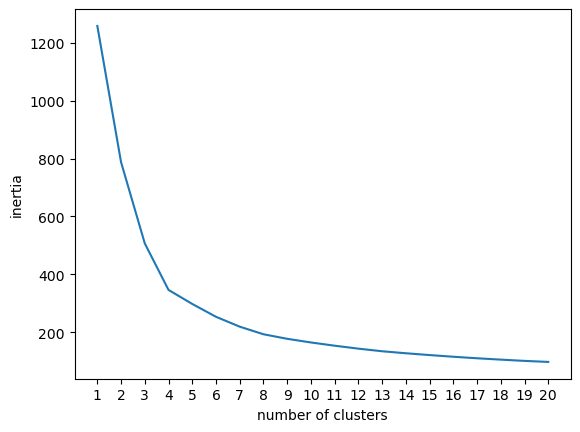

In [77]:
# Elbow method

ks = range(1, 21)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(scaled_df_RFM)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

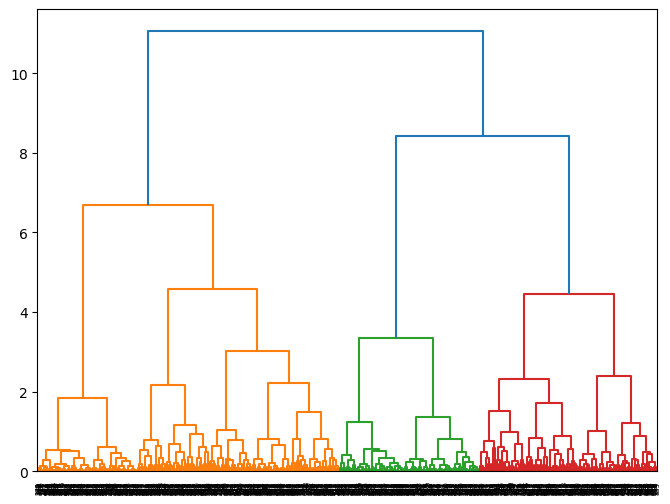

In [78]:
# Dendogram

# Get a random sample, as hierarchical clustering can take a lot of time to run.
df_RFM_sample = scaled_df_RFM.sample(n = 1000, random_state = 100)

# create clusters using the "ward method"
clusters = hierarchy.linkage(df_RFM_sample, method="ward")

# create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

In [79]:
#KMEANS K = 3

df_RFM_k3 = scaled_df_RFM.copy()

model_k3 = KMeans(n_clusters=3, random_state = 100).fit(df_RFM_k3)

df_RFM_k3['RFM_cluster'] = model_k3.labels_

df_RFM_k3.groupby(['RFM_cluster']).mean().transpose()

RFM_cluster         0         1         2
Recency      0.509946  0.772047  0.238337
Frequency    0.637479  0.314888  0.306485
Monetary     0.495465  0.090329  0.088491

In [80]:
#KMEANS K = 4

df_RFM_k4 = scaled_df_RFM.copy()

model_k4 = KMeans(n_clusters=4, random_state = 100).fit(df_RFM_k4)

df_RFM_k4['RFM_cluster'] = model_k4.labels_

df_RFM_k4.groupby(['RFM_cluster']).mean().transpose()

RFM_cluster         0         1         2         3
Recency      0.752077  0.245474  0.251461  0.753653
Frequency    0.265511  0.609164  0.261112  0.617673
Monetary     0.053084  0.429400  0.051411  0.448961

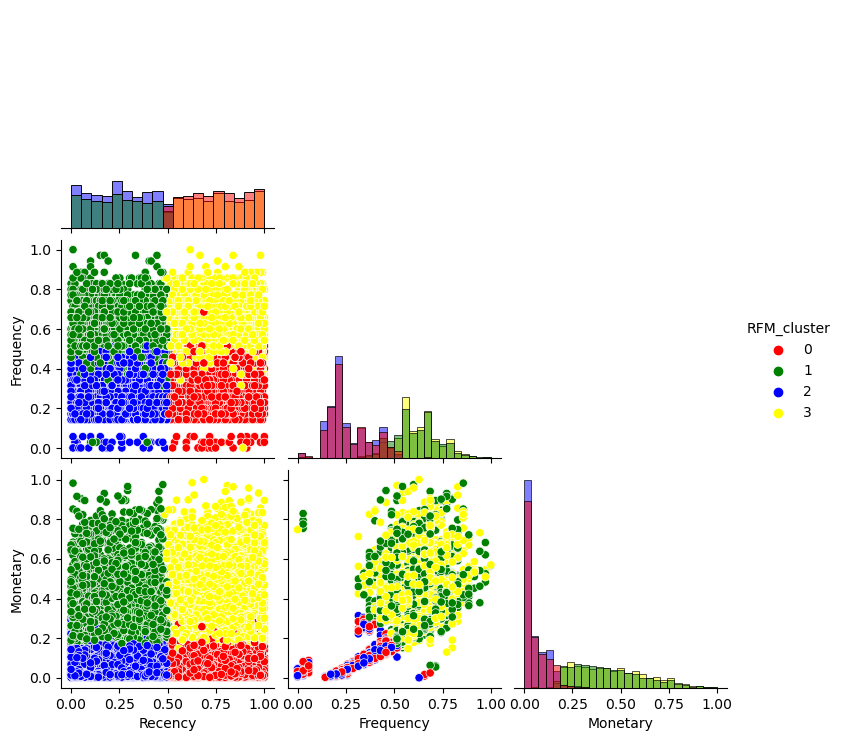

In [81]:
# Define the colors for the clusters
colors = ['red', 'green', 'blue', 'yellow']

# Add the cluster labels as a new column in the original dataframe
df_RFM_k4['RFM_cluster'] = model_k4.labels_

# Create a pair plot with hue set to the cluster labels
sns.pairplot(df_RFM_k4, hue='RFM_cluster', palette=colors, diag_kind='hist', corner=True, height=2.5)

plt.savefig("KMeans_4_RFM.jpg")

# Show the plot
plt.show()

#### DBSCAN

In [82]:
#DBSCAN

# Create a DBSCAN object
dbscan = DBSCAN(eps=0.08, min_samples=4)

# Fit the DBSCAN model on your data
dbscan.fit(scaled_df_RFM)

# Get the labels of each point in the dataset
labels = dbscan.labels_

# Concatenate the labels with your original data
df_RFM_dbscan = pd.concat([scaled_df_RFM.reset_index(drop=True), pd.Series(labels, name='Cluster')], axis=1)

# Group the data by the labels and compute the mean of each group
df_means = df_RFM_dbscan.groupby('Cluster').mean()

# Print the mean of each cluster by each column
df_means.transpose()

Cluster          -1         0         1         2
Recency    0.541648  0.496769  0.499623  0.430976
Frequency  0.594617  0.422642  0.025586  0.942857
Monetary   0.654402  0.223735  0.035833  0.520662

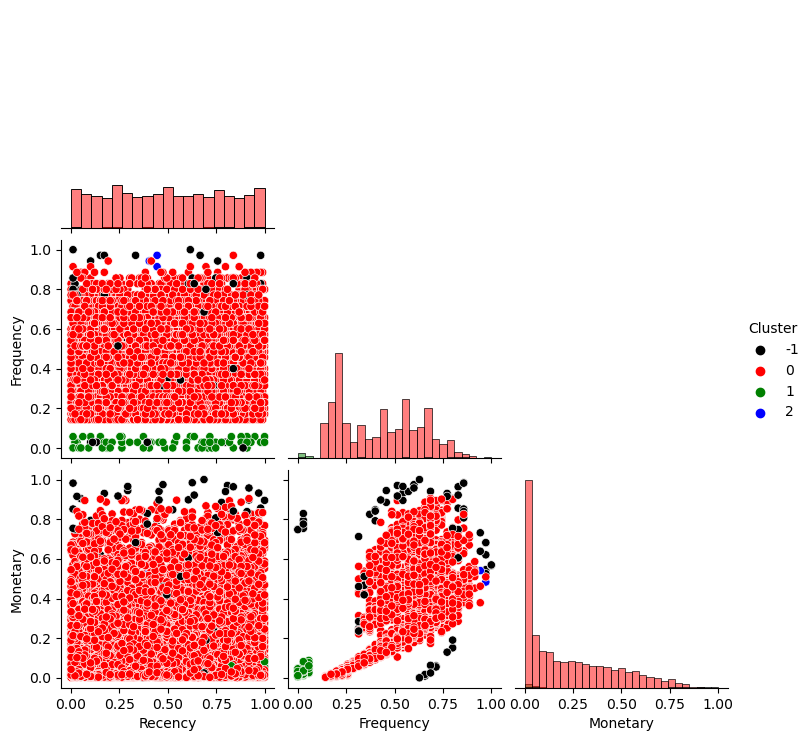

In [83]:
# Set the color palette to use for the clusters
palette = sns.color_palette(['black','red', 'green', 'blue'])

# Create the pair plot
sns.pairplot(df_RFM_dbscan, hue='Cluster', palette=palette, diag_kind='hist', corner=True, height=2.5)

plt.savefig("DBSCAN_RFM.jpg")

# Show the plot
plt.show()

#### Segmentation Analysis For K Means with K = 4

In [84]:
df_original = df[["Recency", "TotalNbPurchases","TotalAmountSpent"]].copy()
demo_view = pd.concat([df_RFM_k4, df_original], axis=1)

In [85]:
# The number of the cluster was changed to obtain results for the four clusters
demo_view[demo_view["RFM_cluster"] == 0][["Recency", "TotalNbPurchases", "TotalAmountSpent"]].describe()

Recency      Recency  TotalNbPurchases  TotalAmountSpent
count  1837.000000  1837.000000       1837.000000       1837.000000
mean      0.752077    74.455634         10.292869       1808.552223
std       0.145974    14.451475          3.845493       1771.258786
min       0.505051    50.000000          1.000000         45.600000
25%       0.626263    62.000000          7.000000        499.000000
50%       0.747475    74.000000          9.000000        989.000000
75%       0.878788    87.000000         13.000000       2757.600000
max       1.000000    99.000000         25.000000      10036.000000

In [86]:
demo_view.describe()

Recency    Frequency     Monetary  RFM_cluster      Recency  \
count  6962.000000  6962.000000  6962.000000  6962.000000  6962.000000   
mean      0.497213     0.420749     0.226323     1.480465    49.224074   
std       0.291522     0.206805     0.230213     1.111500    28.860713   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.242424     0.228571     0.023709     0.000000    24.000000   
50%       0.494949     0.428571     0.140465     2.000000    49.000000   
75%       0.747475     0.600000     0.384395     2.000000    74.000000   
max       1.000000     1.000000     1.000000     3.000000    99.000000   

       TotalNbPurchases  TotalAmountSpent  
count       6962.000000       6962.000000  
mean          15.726228       7561.878766  
std            7.238187       7645.466831  
min            1.000000         45.600000  
25%            9.000000        833.000000  
50%           16.000000       4710.500000  
75%           22.000000      12811.500000  
max           36.000000      33256.000000

In [87]:
df_original = df[['AdherenceDays','TotalNbCampaigns','NumOfferPurchases']].copy()
demo_view = pd.concat([df_RFM_k4, df_original], axis=1)

In [88]:
# The number of the cluster was changed to obtain results for the four clusters
demo_view[demo_view["RFM_cluster"] == 2][['AdherenceDays','TotalNbCampaigns','NumOfferPurchases']].describe()

AdherenceDays  TotalNbCampaigns  NumOfferPurchases
count    1994.000000       1994.000000        1994.000000
mean      509.471414          0.114343           2.384152
std       200.308629          0.346967           1.775925
min       186.000000          0.000000           0.000000
25%       333.000000          0.000000           1.000000
50%       498.000000          0.000000           2.000000
75%       677.000000          0.000000           3.000000
max       884.000000          4.000000          16.000000

In [89]:
demo_view[['AdherenceDays','TotalNbCampaigns','NumOfferPurchases']].describe()

AdherenceDays  TotalNbCampaigns  NumOfferPurchases
count    6962.000000       6962.000000        6962.000000
mean      533.167624          0.316719           2.435938
std       202.774439          0.683568           2.248782
min       186.000000          0.000000           0.000000
25%       358.000000          0.000000           1.000000
50%       527.000000          0.000000           2.000000
75%       709.000000          0.000000           3.000000
max       885.000000          4.000000          16.000000

In [90]:
df_demog = df[['Gender','Education','Marital_Status','TotalNbKids','Income_bins','Age','AdherenceDays','TotalNbCampaigns','NumOfferPurchases']].copy()
demo_view = pd.concat([df_RFM_k4, df_demog], axis=1)

cluster0_demo = demo_view[demo_view.RFM_cluster==0]
cluster1_demo = demo_view[demo_view.RFM_cluster==1]
cluster2_demo = demo_view[demo_view.RFM_cluster==2]
cluster3_demo = demo_view[demo_view.RFM_cluster==3]

demo_view.shape

(6962, 13)

In [91]:
print('***Descriptive Summary of Categorical variables***')
print(cluster0_demo.describe(include = ['O']))

print(' ')
print('***Mean of Dependents***')
print(cluster0_demo['TotalNbKids'].mean())

print(' ')
print('***Mode of Income Bins***')
print(cluster0_demo['Income_bins'].mode())

print(' ')
print('***Average Age***')
print(cluster0_demo['Age'].mean())

print(' ')
print('***Average Adherence Days***')
print(cluster0_demo['AdherenceDays'].mean())

print(' ')
print('***Average Number of Campaigns***')
print(cluster0_demo['TotalNbCampaigns'].mean())

print(' ')
print('***Average Number of Offers***')
print(cluster0_demo['NumOfferPurchases'].mean())

***Descriptive Summary of Categorical variables***
       Gender   Education Marital_Status
count    1837        1837           1837
unique      2           5              4
top      Male  Graduation         Single
freq     1356         896            824
 
***Mean of Dependents***
1.2487751769188895
 
***Mode of Income Bins***
0    Low
Name: Income_bins, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']
 
***Average Age***
44.98203592814371
 
***Average Adherence Days***
513.0141535111595
 
***Average Number of Campaigns***
0.12574850299401197
 
***Average Number of Offers***
2.527490473598258


In [92]:
print('***Descriptive Summary of Categorical variables***')
print(cluster1_demo.describe(include = ['O']))

print(' ')
print('***Mean of Dependents***')
print(cluster1_demo['TotalNbKids'].mean())

print(' ')
print('***Mode of Income Bins***')
print(cluster1_demo['Income_bins'].mode())

print(' ')
print('***Average Age***')
print(cluster1_demo['Age'].mean())

print(' ')
print('***Average Adherence Days***')
print(cluster1_demo['AdherenceDays'].mean())

***Descriptive Summary of Categorical variables***
       Gender   Education Marital_Status
count    1537        1537           1537
unique      2           4              4
top      Male  Graduation         Single
freq     1135         778            737
 
***Mean of Dependents***
0.5731945348080677
 
***Mode of Income Bins***
0    Medium
Name: Income_bins, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']
 
***Average Age***
48.55172413793103
 
***Average Adherence Days***
556.6837996096292


In [93]:
print('***Descriptive Summary of Categorical variables***')
print(cluster2_demo.describe(include = ['O']))

print(' ')
print('***Mean of Dependents***')
print(cluster2_demo['TotalNbKids'].mean())

print(' ')
print('***Mode of Income Bins***')
print(cluster2_demo['Income_bins'].mode())

print(' ')
print('***Average Age***')
print(cluster2_demo['Age'].mean())

print(' ')
print('***Average Adherence Days***')
print(cluster2_demo['AdherenceDays'].mean())

***Descriptive Summary of Categorical variables***
       Gender   Education Marital_Status
count    1994        1994           1994
unique      2           5              4
top      Male  Graduation         Single
freq     1454        1024            950
 
***Mean of Dependents***
1.2251755265797393
 
***Mode of Income Bins***
0    Low
Name: Income_bins, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']
 
***Average Age***
44.972918756268804
 
***Average Adherence Days***
509.4714142427282


In [94]:
print('***Descriptive Summary of Categorical variables***')
print(cluster3_demo.describe(include = ['O']))

print(' ')
print('***Mean of Dependents***')
print(cluster3_demo['TotalNbKids'].mean())

print(' ')
print('***Mode of Income Bins***')
print(cluster3_demo['Income_bins'].mode())

print(' ')
print('***Average Age***')
print(cluster3_demo['Age'].mean())

print(' ')
print('***Average Adherence Days***')
print(cluster3_demo['AdherenceDays'].mean())

***Descriptive Summary of Categorical variables***
       Gender   Education Marital_Status
count    1594        1594           1594
unique      2           5              4
top      Male  Graduation         Single
freq     1159         803            718
 
***Mean of Dependents***
0.5351317440401505
 
***Mode of Income Bins***
0    Medium
Name: Income_bins, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']
 
***Average Age***
48.41217063989962
 
***Average Adherence Days***
563.3607277289836


<div class="alert alert-block alert-info" style="padding-top:0px">

<a id='missing'></a>

### Silhouette coefficient
    
</div>

In [95]:
# Compute the silhouette coefficient - changed for all algorithms
score = silhouette_score(df_RFM_k4, model_k4.labels_)
print("Silhouette Coefficient:", score)

Silhouette Coefficient: 0.7668372575188995


<div class="alert alert-block alert-info" style="padding-top:0px">

<a id='missing'></a>

### Merging Perspectives
    
</div>

In [96]:
final_df = pd.concat([df_product_k6, df_RFM_k4], axis = 1)

In [97]:
final_df['concat'] = df_product_k6['product_cluster'].astype(str) + df_RFM_k4['RFM_cluster'].astype(str)

In [98]:
final_df['concat'].value_counts()

02    1508
00    1381
33     592
31     551
12     476
10     436
43     366
41     366
23     337
21     317
11     273
13     265
53      34
51      30
40      12
42       8
50       4
20       3
22       1
30       1
52       1
Name: concat, dtype: int64

<div class="alert alert-block alert-info" style="padding-top:0px">

<a id='missing'></a>

### Demographic Cluster Segmentation
    
</div>

In [99]:
#One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'])
print(df_encoded)


                            Name  Birthyear    Income  Kid_Younger6  \
CustomerID                                                            
14594            Miss Leah Lewis       1981  113947.0             0   
19070           Miss Grace Black       1974  114297.0             0   
29888         Mr. Gavin Morrison       1960  115476.0             0   
12221            Mr. Ryan Glover       1980  101172.0             1   
21107          Mr. Paul Anderson       1971  123128.0             0   
...                          ...        ...       ...           ...   
30686            Mr. John Hughes       1994   98968.0             0   
17210        Mr. Brandon Simpson       1985  109977.0             0   
29186       Mr. Thomas Churchill       1967   56039.0             0   
23312         Miss Angela Murray       1989   44867.0             1   
15581          Miss Diana Taylor       1960  124379.0             0   

            Children_6to18  Response_Cmp1  Response_Cmp2  Response_Cmp3  \
C

In [100]:
df_clusters1 = df_encoded[['TotalAmountSpent', 'Income', 'NumAppPurchases', 'NumAppVisitsMonth', 'Age', 'Education_Basic', 'Education_Graduation', 'Education_HighSchool', 'Education_Master', 'Education_PhD', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Widow']].copy()
df_clusters1

TotalAmountSpent    Income  NumAppPurchases  NumAppVisitsMonth  \
CustomerID                                                                   
14594                16676.0  113947.0               10                  4   
19070                21486.0  114297.0                5                  2   
29888                13448.0  115476.0                5                  1   
12221                 5634.0  101172.0                8                  5   
21107                17303.0  123128.0                4                  5   
...                      ...       ...              ...                ...   
30686                15665.0   98968.0                6                  2   
17210                24246.0  109977.0                5                  2   
29186                  680.0   56039.0                3                  6   
23312                  647.0   44867.0                3                  8   
15581                15269.0  124379.0                6                  2   

            Age  Education_Basic  Education_Graduation  Education_HighSchool  \
CustomerID                                                                     
14594        42                0                     1                     0   
19070        49                0                     1                     0   
29888        63                0                     0                     0   
12221        43                0                     1                     0   
21107        52                0                     0                     1   
...         ...              ...                   ...                   ...   
30686        29                0                     0                     0   
17210        38                0                     1                     0   
29186        56                0                     0                     0   
23312        34                0                     1                     0   
15581        63                0                     1                     0   

            Education_Master  Education_PhD  Marital_Status_Divorced  \
CustomerID                                                             
14594                      0              0                        0   
19070                      0              0                        0   
29888                      0              1                        0   
12221                      0              0                        0   
21107                      0              0                        0   
...                      ...            ...                      ...   
30686                      0              1                        1   
17210                      0              0                        1   
29186                      0              1                        0   
23312                      0              0                        0   
15581                      0              0                        0   

            Marital_Status_Married  Marital_Status_Single  \
CustomerID                                                  
14594                            0                      1   
19070                            0                      1   
29888                            0                      1   
12221                            1                      0   
21107                            0                      1   
...                            ...                    ...   
30686                            0                      0   
17210                            0                      0   
29186                            0                      1   
23312                            0                      1   
15581                            0                      1   

            Marital_Status_Widow  
CustomerID                        
14594                          0  
19070                          0  
29888                          0  
12221                          0  
21107          

In [101]:
df_clusters1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6962 entries, 14594 to 15581
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TotalAmountSpent         6962 non-null   float64
 1   Income                   6962 non-null   float64
 2   NumAppPurchases          6962 non-null   int64  
 3   NumAppVisitsMonth        6962 non-null   int64  
 4   Age                      6962 non-null   int64  
 5   Education_Basic          6962 non-null   uint8  
 6   Education_Graduation     6962 non-null   uint8  
 7   Education_HighSchool     6962 non-null   uint8  
 8   Education_Master         6962 non-null   uint8  
 9   Education_PhD            6962 non-null   uint8  
 10  Marital_Status_Divorced  6962 non-null   uint8  
 11  Marital_Status_Married   6962 non-null   uint8  
 12  Marital_Status_Single    6962 non-null   uint8  
 13  Marital_Status_Widow     6962 non-null   uint8  
dtypes: float64(2), int6

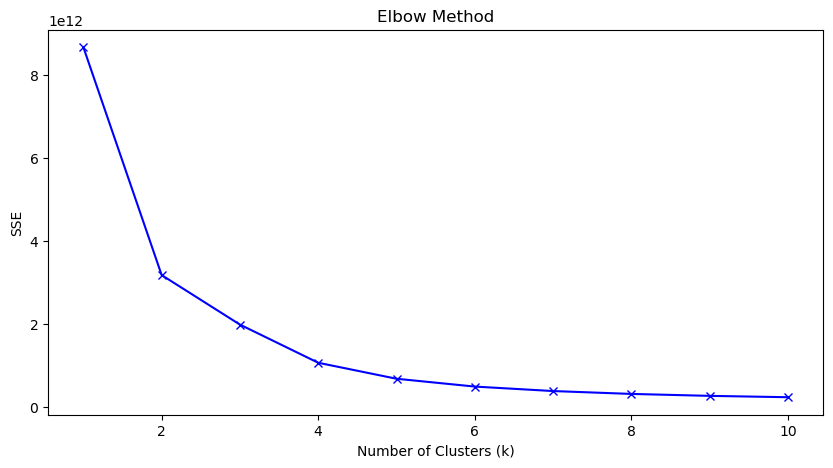

In [102]:
# Elbow method

sse = []

# Fit KMeans models for k values 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_clusters1)
    sse.append(kmeans.inertia_)

# Plot the SSE values against k
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

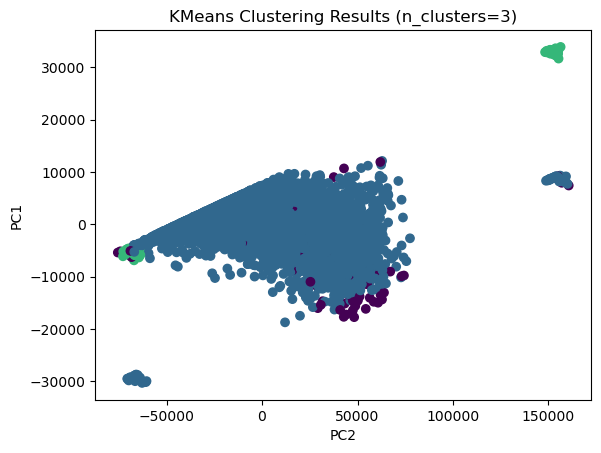

In [103]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_clusters1)

# Create a scatter plot of the reduced data with color-coded clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.title('KMeans Clustering Results (n_clusters=3)')
plt.show()


Number of clusters: 0


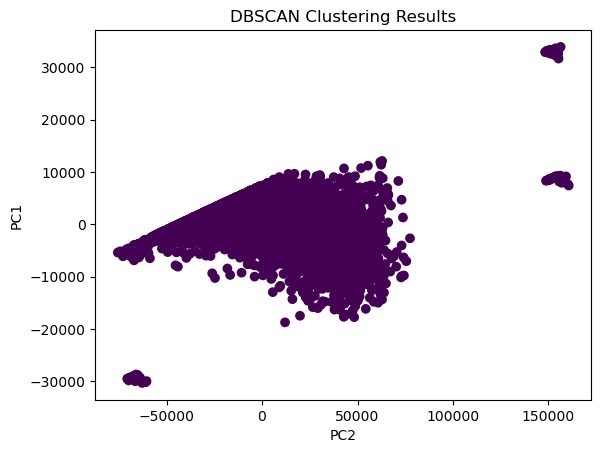

In [104]:
# Trying dbscan

from sklearn.cluster import DBSCAN

# Initialize the DBSCAN object
dbscan = DBSCAN(eps=3, min_samples=10)

# Fit the data to the DBSCAN object
labels = dbscan.fit_predict(df_clusters1)

# Print the number of clusters (-1 indicates noisy samples)
print("Number of clusters:", len(set(labels)) - (1 if -1 in labels else 0))

# Plot the clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_clusters1)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.title('DBSCAN Clustering Results')
plt.show()
